In [1]:
from bone_data import BoneData

In [2]:
bone_data = BoneData()

In [3]:
print(len(bone_data.images_data), len(bone_data.images_label_data))

500 500


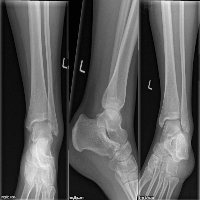

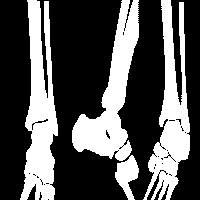

In [4]:
import PIL
from PIL import ImageOps, Image
import numpy as np

image_index = 283 - 1
im_xray = Image.fromarray(bone_data.images_data[image_index])
im_bone = Image.fromarray(np.uint8(bone_data.images_label_data[image_index]))

im_contrast = ImageOps.autocontrast(im_bone, cutoff = 2, ignore = 2)
  
display(im_xray)
display(im_contrast)

In [8]:
from xnet import model as Model
import tensorflow as tf
from tensorflow import keras
with tf.device("cpu"):
    # Free up RAM in case the model definition cells were run multiple times
    keras.backend.clear_session()
    xnet_model = Model(input_shape=(200, 200, 3), classes=2)

NameError: name 'keras' is not defined

In [7]:
xnet_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
conv2d_15 (Conv2D)              (None, 200, 200, 64) 1792        input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_14 (BatchNo (None, 200, 200, 64) 256         conv2d_15[0][0]                  
__________________________________________________________________________________________________
activation_15 (Activation)      (None, 200, 200, 64) 0           batch_normalization_14[0][0]     
____________________________________________________________________________________________

In [ ]:
xnet_model.compile